<a href="https://colab.research.google.com/github/Devansh-0/YOLOv5-Classifier/blob/main/GITHUB_YOLOv5_Classifier_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget -q https://pjreddie.com/media/files/yolov3.weights -P /content/
!wget -q https://github.com/pjreddie/darknet/blob/master/cfg/yolov3.cfg?raw=true -O /content/yolov3.cfg
!wget -q https://raw.githubusercontent.com/pjreddie/darknet/master/data/coco.names -O /content/coco.names



In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Load YOLO
net = cv2.dnn.readNet("yolov3.weights", "yolov3.cfg")
classes = []
with open("coco.names", "r") as f:
    classes = [line.strip() for line in f.readlines()]
layer_names = net.getLayerNames()
output_layers = [layer_names[i - 1] for i in net.getUnconnectedOutLayers()]

# Load image
img = cv2.imread("/content/brep_9m7f_211123.jpg")
height, width, channels = img.shape

# Detecting objects
blob = cv2.dnn.blobFromImage(img, 0.00392, (416, 416), (0, 0, 0), True, crop=False)
net.setInput(blob)
outs = net.forward(output_layers)

# Showing information on the screen
class_ids = []
confidences = []
boxes = []
for out in outs:
    for detection in out:
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]
        if confidence > 0.5:  # Confidence threshold
            # Object detected
            center_x = int(detection[0] * width)
            center_y = int(detection[1] * height)
            w = int(detection[2] * width)
            h = int(detection[3] * height)
            # Rectangle coordinates
            x = int(center_x - w / 2)
            y = int(center_y - h / 2)
            boxes.append([x, y, w, h])
            confidences.append(float(confidence))
            class_ids.append(class_id)

indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)

font = cv2.FONT_HERSHEY_PLAIN
colors = np.random.uniform(0, 255, size=(len(classes), 3))

for i in range(len(boxes)):
    if i in indexes:
        x, y, w, h = boxes[i]
        label = str(classes[class_ids[i]])
        confidence = confidences[i]
        color = colors[i]
        cv2.rectangle(img, (x, y), (x + w, y + h), color, 2)
        cv2.putText(img, f"{label} {confidence:.2f}", (x, y + 30), font, 3, color, 3)

cv2_imshow(img)
cv2.waitKey(0)
cv2.destroyAllWindows()


error: OpenCV(4.8.0) /io/opencv/modules/dnn/src/darknet/darknet_importer.cpp:210: error: (-212:Parsing error) Failed to open NetParameter file: yolov3.cfg in function 'readNetFromDarknet'


## Labeled Images with organized forlders

In [ ]:
# Install dependencies
!pip install opencv-python torch torchvision

# Clone YOLOv5 repository
!git clone https://github.com/ultralytics/yolov5.git

# Navigate to YOLOv5 directory
%cd yolov5

Cloning into 'yolov5'...
remote: Enumerating objects: 16517, done.
remote: Counting objects: 100% (115/115), done.
remote: Compressing objects: 100% (99/99), done.
remote: Total 16517 (delta 47), reused 50 (delta 16), pack-reused 16402
Receiving objects: 100% (16517/16517), 15.18 MiB | 16.28 MiB/s, done.
Resolving deltas: 100% (11307/11307), done.
/content/yolov5/yolov5/yolov5/yolov5/yolov5


In [ ]:

# Import necessary libraries
import cv2
import torch
import os

# Load YOLOv5 model
model = torch.hub.load('ultralytics/yolov5', 'yolov5s', pretrained=True)

# Define the root directory where images are stored
root_dir = '/content/drive/MyDrive/ANIMAL 2'

# Define the directory where annotations will be saved
annotations_dir = '/content/annotations'
os.makedirs(annotations_dir, exist_ok=True)

# Define the list of class names (corresponding to folder names)
class_names = os.listdir(root_dir)

# Function to convert bounding box coordinates to YOLO format
def convert_to_yolo_format(class_index, x_min, y_min, x_max, y_max, img_width, img_height):
    x_center = (x_min + x_max) / 2 / img_width
    y_center = (y_min + y_max) / 2 / img_height
    width = (x_max - x_min) / img_width
    height = (y_max - y_min) / img_height
    return f"{class_index} {x_center} {y_center} {width} {height}"

# Loop through each class folder
for class_index, class_name in enumerate(class_names):
    class_dir = os.path.join(root_dir, class_name)
    image_files = [file for file in os.listdir(class_dir) if file.endswith(('.jpg', '.jpeg', '.png'))]

    # Loop through each image in the class folder
    for image_file in image_files:
        image_path = os.path.join(class_dir, image_file)
        image_name = os.path.splitext(image_file)[0]

        # Load the image
        img = cv2.imread(image_path)

        # Detect objects in the image
        results = model(img)

        # Extract bounding box coordinates and confidence scores
        bounding_boxes = results.xyxy[0][:, :4].cpu().numpy()  # Format: [x_min, y_min, x_max, y_max]
        confidence_scores = results.xyxy[0][:, 4].cpu().numpy()  # Confidence scores for each detection

        # Convert bounding box coordinates to YOLO format
        yolo_annotation = ""
        for box, confidence in zip(bounding_boxes, confidence_scores):
            x_min, y_min, x_max, y_max = box
            img_height, img_width, _ = img.shape
            yolo_annotation += convert_to_yolo_format(class_index, x_min, y_min, x_max, y_max, img_width, img_height) + "\n"

        # Write YOLO annotation to a text file
        annotation_file = os.path.join(annotations_dir, f"{image_name}.txt")
        with open(annotation_file, 'w') as f:
            f.write(yolo_annotation)

print("Annotations generated successfully.")


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2024-3-19 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

100%|██████████| 14.1M/14.1M [00:00<00:00, 369MB/s]

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


NotADirectoryError: [Errno 20] Not a directory: '/content/drive/MyDrive/ANIMAL 2/C3-Birman.cache'

Annotations in single folder

In [ ]:
# Import necessary libraries
import cv2
import torch
import os

# Load YOLOv5 model
model = torch.hub.load('ultralytics/yolov5', 'yolov5s', pretrained=True)

# Define the root directory where images are stored
root_dir = '/content/drive/MyDrive/ANIMAL 2'

# Define the directory where annotations will be saved
annotations_dir = '/content/annotations1'
os.makedirs(annotations_dir, exist_ok=True)

# Define the list of class names (corresponding to folder names)
class_names = os.listdir(root_dir)

# Function to convert bounding box coordinates to YOLO format
def convert_to_yolo_format(class_index, x_min, y_min, x_max, y_max, img_width, img_height):
    x_center = (x_min + x_max) / 2 / img_width
    y_center = (y_min + y_max) / 2 / img_height
    width = (x_max - x_min) / img_width
    height = (y_max - y_min) / img_height
    return f"{class_index} {x_center} {y_center} {width} {height}"

# Define the output annotation file
output_annotation_file = os.path.join(annotations_dir, "annotations1.txt")

# Open the annotation file for writing
with open(output_annotation_file, 'w') as f_out:
    # Loop through each class folder
    for class_index, class_name in enumerate(class_names):
        class_dir = os.path.join(root_dir, class_name)
        image_files = [file for file in os.listdir(class_dir) if file.endswith(('.jpg', '.jpeg', '.png'))]

        # Loop through each image in the class folder
        for image_file in image_files:
            image_path = os.path.join(class_dir, image_file)
            image_name = os.path.splitext(image_file)[0]

            # Load the image
            img = cv2.imread(image_path)

            # Detect objects in the image
            results = model(img)

            # Extract bounding box coordinates and confidence scores
            bounding_boxes = results.xyxy[0][:, :4].cpu().numpy()  # Format: [x_min, y_min, x_max, y_max]
            confidence_scores = results.xyxy[0][:, 4].cpu().numpy()  # Confidence scores for each detection

            # Convert bounding box coordinates to YOLO format and write to the output file
            for box, confidence in zip(bounding_boxes, confidence_scores):
                x_min, y_min, x_max, y_max = box
                img_height, img_width, _ = img.shape
                yolo_annotation = convert_to_yolo_format(class_index, x_min, y_min, x_max, y_max, img_width, img_height)
                f_out.write(f"{image_name}.jpg {yolo_annotation}\n")

print("Annotations generated successfully.")


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2024-3-19 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


Annotations generated successfully.


Training the model

![confusion_matrix.png](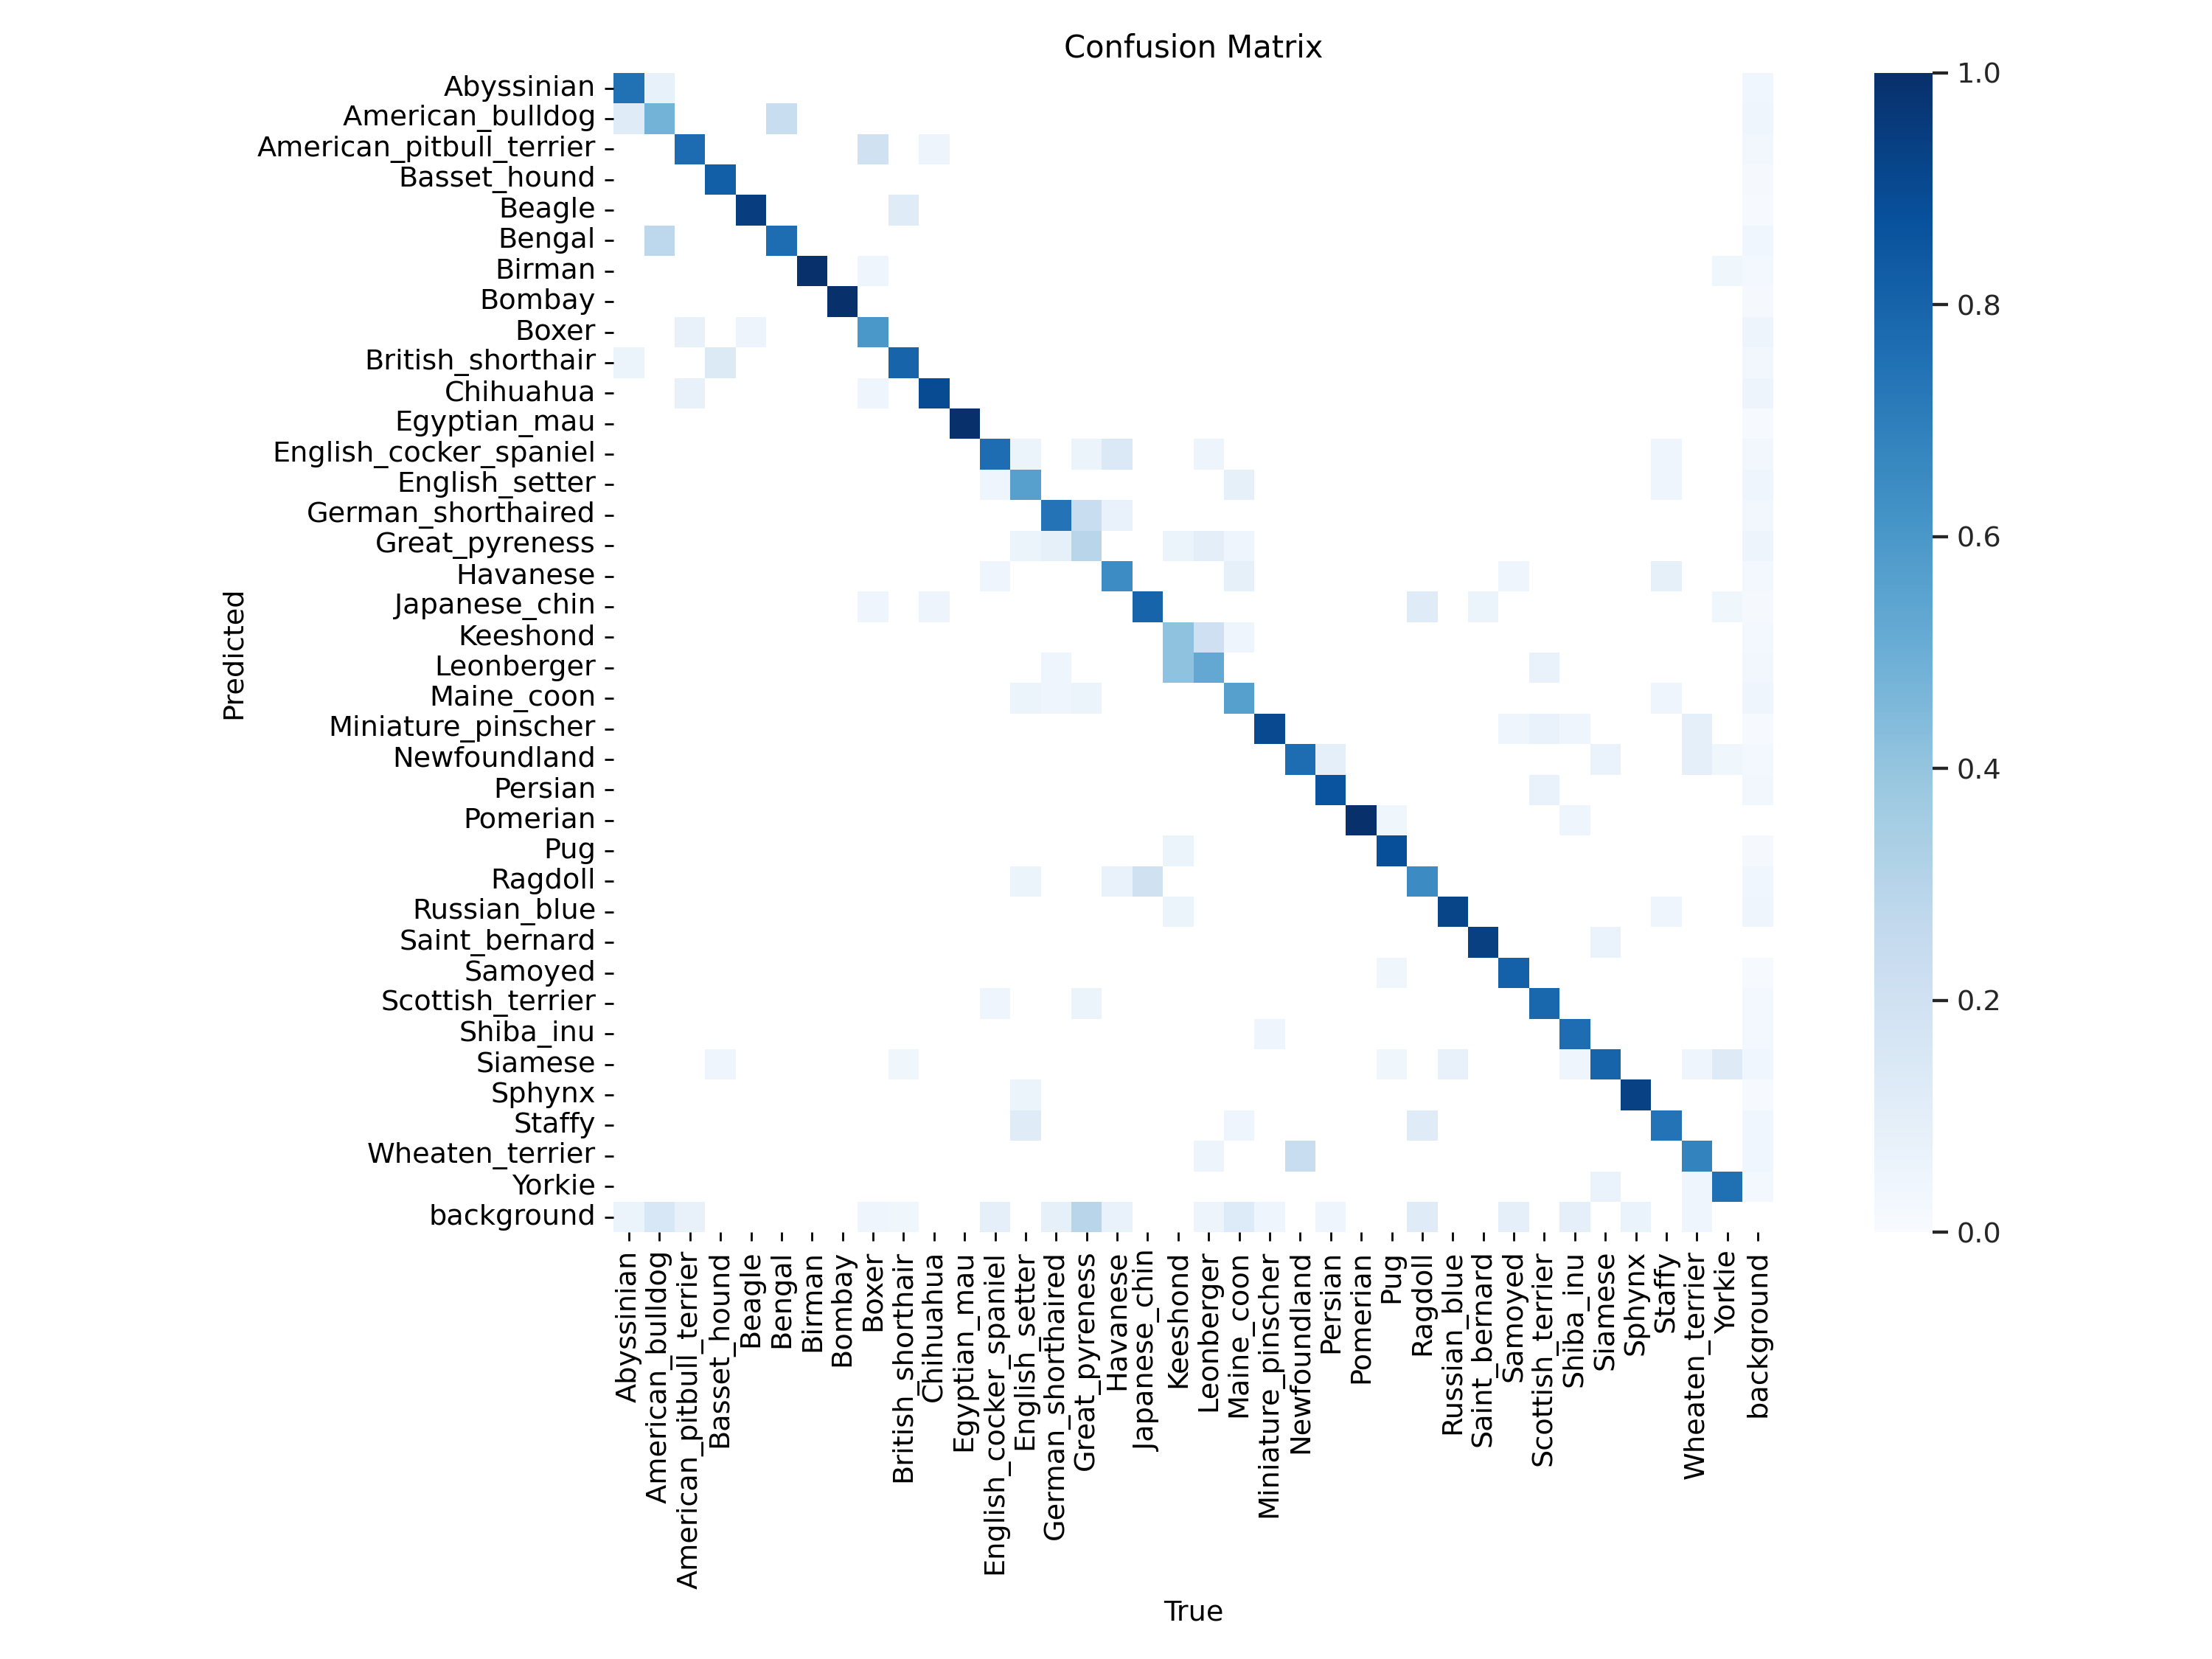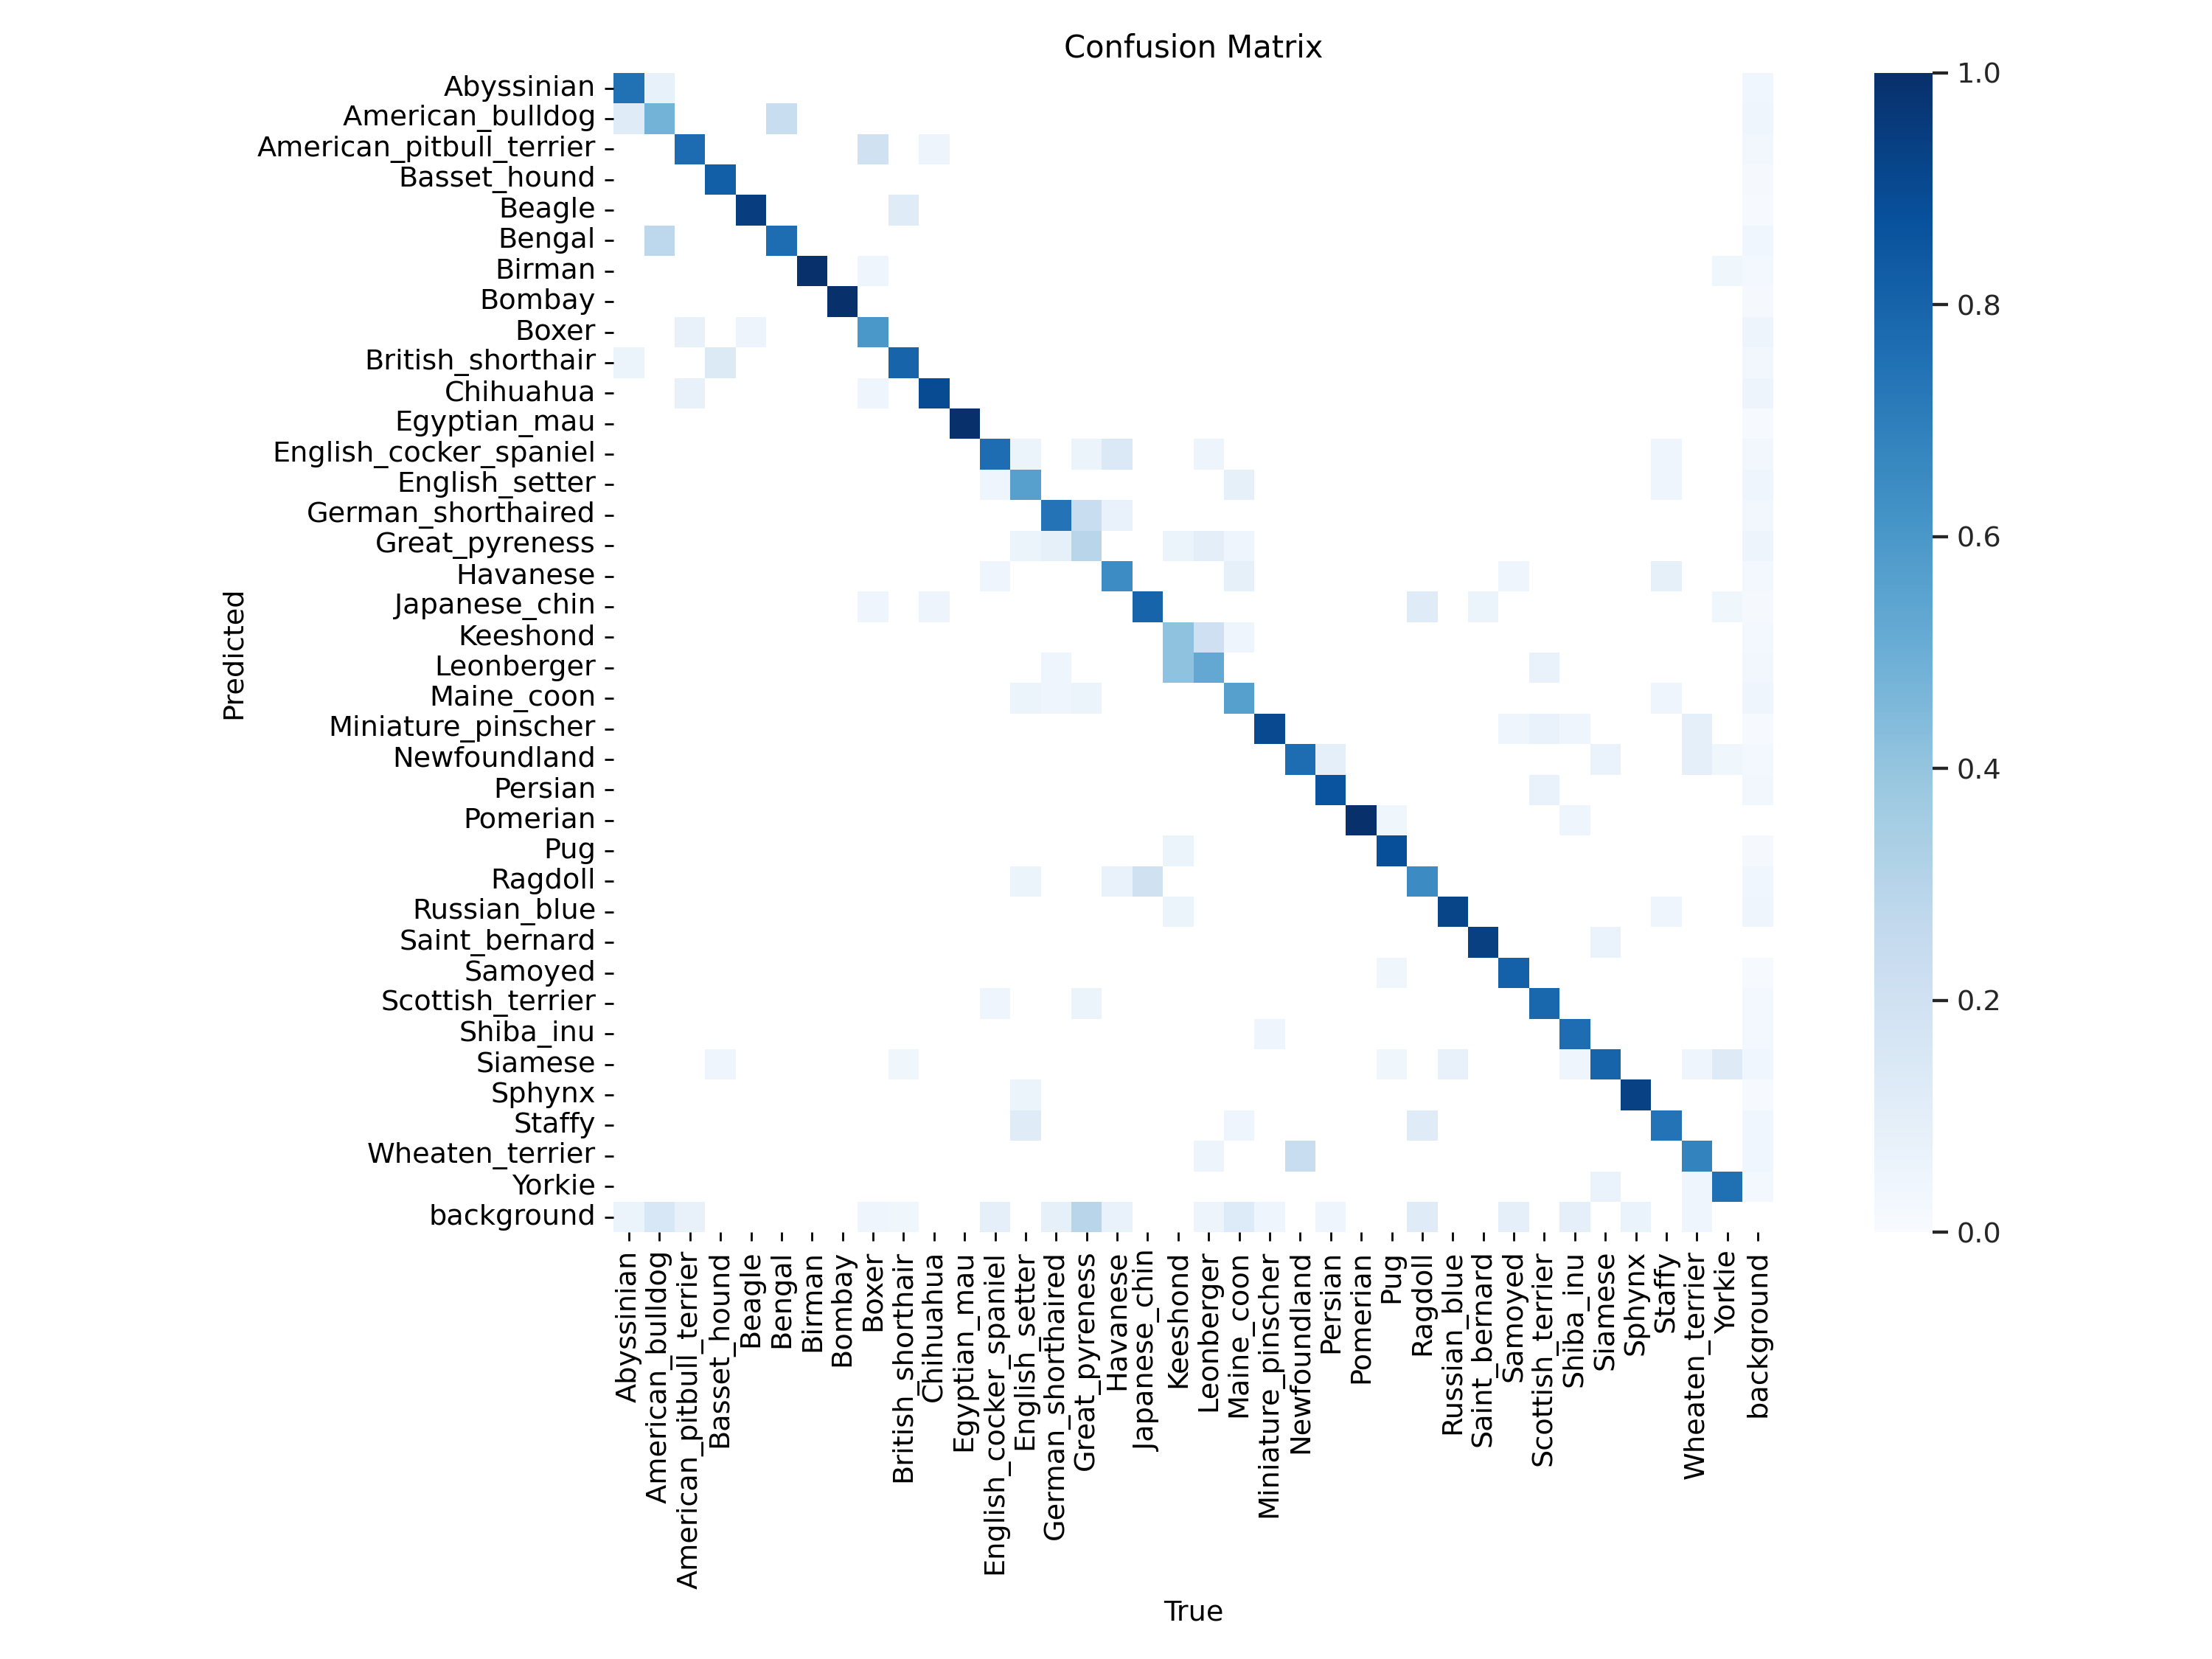)

In [ ]:
# Clone YOLOv5 repository
!git clone https://github.com/ultralytics/yolov5.git

# Navigate to YOLOv5 directory
%cd yolov5

# Install dependencies
!pip install -U -r requirements.txt

# Define the directory structure
data_dir = '/content/drive/MyDrive/oxford_breed'
train_dir = '/content/drive/MyDrive/oxford_breed/train'
valid_dir = '/content/drive/MyDrive/oxford_breed/valid'
test_dir = '/content/drive/MyDrive/oxford_breed/test'

# Define the YOLOv5 configuration
config = f"""
train: {data_dir}/{train_dir}/images
val: {data_dir}/{valid_dir}/images
test: {data_dir}/{test_dir}/images

nc: 37  # number of classes
names: ['Abyssinian',' American_bulldog', 'American_pitbull_terrier','Basset_hound', 'Beagle', 'Bengal',
        'Birman', 'Bombay', 'Boxer', 'British_shorthair', 'Chihuahua', 'Egyptian_mau', 'English_cocker_spaniel',
        'English_setter', 'German_shorthaired','Great_pyreness', 'Havanese', 'Japanese_chin', 'Keeshond', 'Leonberger',
         'Maine_coon', 'Miniature_pinscher', 'Newfoundland', 'Persian', 'Pomerian', 'Pug', 'Ragdoll', 'Russian_blue',
          'Saint_bernard', 'Samoyed', 'Scottish_terrier', 'Shiba_inu', 'Siamese', 'Sphynx', 'Staffy', 'Wheaten_terrier', 'Yorkie']  # class names
"""

# Write the configuration to a YAML file
with open('data.yaml', 'w') as f:
    f.write(config)

# Train the YOLOv5 model
!python train.py --img 640 --batch 16 --epochs 50 --data data.yaml --cfg models/yolov5s.yaml --weights '' --name my_custom_model


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os

# Clone YOLOv5 repository
!git clone https://github.com/ultralytics/yolov5.git

# Navigate to YOLOv5 directory
%cd yolov5

# Install dependencies
!pip install -U -r requirements.txt

# Define the directory structure
data_dir = '/content/drive/MyDrive/oxford_breed'
train_dir = '/content/drive/MyDrive/oxford_breed/train'
valid_dir = '/content/drive/MyDrive/oxford_breed/valid'
test_dir = '/content/drive/MyDrive/oxford_breed/test'

# Verify Dataset Directory Structure
for directory in ['train', 'valid', 'test']:
    images_dir = os.path.join(data_dir, directory, 'images')
    labels_dir = os.path.join(data_dir, directory, 'labels')
    if not os.path.exists(images_dir) or not os.path.exists(labels_dir):
        raise FileNotFoundError(f"Images or labels directory not found in {directory} dataset.")

# Verify Dataset Path
if not os.path.exists(data_dir):
    raise FileNotFoundError("Dataset directory not found.")

# Define the YOLOv5 configuration
config = f"""
train: {train_dir}/images
val: {valid_dir}/images
test: {test_dir}/images

nc: 37  # number of classes
names: ['Abyssinian',' American_bulldog', 'American_pitbull_terrier','Basset_hound', 'Beagle', 'Bengal',
        'Birman', 'Bombay', 'Boxer', 'British_shorthair', 'Chihuahua', 'Egyptian_mau', 'English_cocker_spaniel',
        'English_setter', 'German_shorthaired','Great_pyreness', 'Havanese', 'Japanese_chin', 'Keeshond', 'Leonberger',
         'Maine_coon', 'Miniature_pinscher', 'Newfoundland', 'Persian', 'Pomerian', 'Pug', 'Ragdoll', 'Russian_blue',
          'Saint_bernard', 'Samoyed', 'Scottish_terrier', 'Shiba_inu', 'Siamese', 'Sphynx', 'Staffy', 'Wheaten_terrier', 'Yorkie']  # class names """

yaml_file = 'data.yaml'
# Write the configuration to a YAML file
with open('data.yaml', 'w') as f:
    f.write(config)

# Print the content of the YAML file
with open(yaml_file, 'r') as f:
    yaml_content = f.read()
    print("YAML Configuration:")
    print(yaml_content)

# Train the YOLOv5 model
!python train.py --img 640 --batch 16 --epochs 130 --data data.yaml --cfg models/yolov5s.yaml --weights '' --name final_model


fatal: destination path 'yolov5' already exists and is not an empty directory.
/content/yolov5
YAML Configuration:

train: /content/drive/MyDrive/oxford_breed/train/images
val: /content/drive/MyDrive/oxford_breed/valid/images
test: /content/drive/MyDrive/oxford_breed/test/images

nc: 37  # number of classes
names: ['Abyssinian',' American_bulldog', 'American_pitbull_terrier','Basset_hound', 'Beagle', 'Bengal',
        'Birman', 'Bombay', 'Boxer', 'British_shorthair', 'Chihuahua', 'Egyptian_mau', 'English_cocker_spaniel',
        'English_setter', 'German_shorthaired','Great_pyreness', 'Havanese', 'Japanese_chin', 'Keeshond', 'Leonberger',
         'Maine_coon', 'Miniature_pinscher', 'Newfoundland', 'Persian', 'Pomerian', 'Pug', 'Ragdoll', 'Russian_blue',
          'Saint_bernard', 'Samoyed', 'Scottish_terrier', 'Shiba_inu', 'Siamese', 'Sphynx', 'Staffy', 'Wheaten_terrier', 'Yorkie']  # class names 
2024-03-23 10:22:12.637580: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:92